In [1]:
# Last modification: 2015-aug-29 Bogota
%pylab inline
from random import *
from observational_data import *
from constants import *
from functions import *

Populating the interactive namespace from numpy and matplotlib


observational_data.py:64: RuntimeWarning: divide by zero encountered in divide
  Obs_data2_log10yerror = [array(log10(Bouwens[:,1]/(Bouwens[:,1]-Bouwens[:,2]))),


Dust Extinction ON


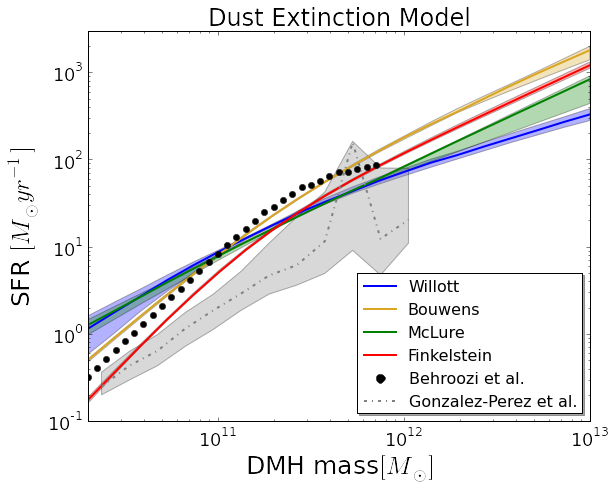

In [25]:
Dust_Ext = 1
### MINIMUN MASS IN THE CATALOG: 10**10.3 Msun

Parameters=[]

N_Obs_Sets = [1,]       # OD1
for i in N_Obs_Sets:
    if (Dust_Ext == 1):
        Parameters.append(np.loadtxt('../../sfr-dmhm/program/analysis/best_parameters_w_ext_OD'
                                     +str(i)+'.dat',usecols=(0,1,2,3),skiprows=1))
    else:
        Parameters.append(np.loadtxt('../../sfr-dmhm/program/analysis/best_parameters_wo_ext_OD'
                                     +str(i)+'.dat',usecols=(0,1,2,3),skiprows=1))

        
DATA = np.loadtxt("../../sfr-dmhm/program_small/analysis/OD4/Best_Parameters_w_dust.dat"
                  ,delimiter=",", usecols=(0,3,6,9))

N_Obs_Sets = [2,3,4]       # OD2, OD3, OD4
for i in N_Obs_Sets:
    if (Dust_Ext == 1):
        Parameters.append(
        np.loadtxt("../../sfr-dmhm/program_small/analysis/OD"+str(i)
                   +"/Best_Parameters_w_dust.dat", delimiter=",", usecols=(0,3,6,9))
                         )
        
    else:
        Parameters.append(
        np.loadtxt("../../sfr-dmhm/program_small/analysis/OD"+str(i)
                   +"/Best_Parameters_wo_dust.dat",delimiter=",", usecols=(0,3,6,9))
                         )

Parameters = np.array(Parameters)


#N_Obs_Sets = range(4)
Dust_Extinction()
Parameters = np.array(Parameters)

Mass = logspace(10.3,13,20)

L_0  = []
M_0  = []
beta = []
gamma= []

for k in range(4):
    L_0.append(10**Parameters[k][:,0])
    M_0.append(10**Parameters[k][:,1])
    beta.append(Parameters[k][:,2])
    gamma.append(Parameters[k][:,3])
    
SFR = []


for i in range(4):
    aux = []
    for j in range(len(L_0[i])):
         aux.append( 
                array(StarFormationRate(Mass, L_0[i][j], M_0[i][j], beta[i][j], gamma[i][j])) )
    aux = array(aux)
    SFR.append( aux )

SFR = array(SFR)    


SFR_1qrt = []
SFR_2qrt = []
SFR_3qrt = []

for i in range(4):

    l =  len(SFR[i])
    aux1 = []
    aux2 = []
    aux3 = []
    
    for j in range( 20 ):
        aux = []
        for k in range(l):
            aux.append(SFR[i][k,j])
        #SFR_1qrt.append( percentile(SFR[i][:,j],25) )
        #SFR_2qrt.append( percentile(SFR[i][:,j],50) )
        #SFR_3qrt.append( percentile(SFR[i][:,j],75) )
        aux1.append(percentile( aux ,25))
        aux2.append(percentile( aux ,50))
        aux3.append(percentile( aux ,75))
    SFR_1qrt.append( aux1 )
    SFR_2qrt.append( aux2 )
    SFR_3qrt.append( aux3 )
    
SFR_1qrt = array(SFR_1qrt)
SFR_2qrt = array(SFR_2qrt)
SFR_3qrt = array(SFR_3qrt)

#################################################################
#                                                               #
#                           Plotting                            #
#                                                               #
#################################################################
        
colors=['blue','GoldenRod','green','red']
#lnst=['--', '-', '-.', ':']
lnst=['-', '-', '-', '-']
authors=[OD1[3], OD2[3], OD3[3], OD4[3]]
figure(figsize=(9,7))

################################
#              Our results 
for i in range(0,4):
    plot(Mass,SFR_2qrt[i],color=colors[i], ls=lnst[i], label=authors[i], linewidth=2)
    fill_between(Mass,SFR_1qrt[i],SFR_3qrt[i], facecolor=colors[i],alpha=0.3)
    plt.yscale('log', nonposy='clip')
    plt.xscale('log')
    
################################
#  Behroozi et al & Perez et al    
plot( 10**Behroozi[:,0], 10**Behroozi[:,1], 'ko', label='Behroozi et al.')
plot(10**Gonzalez[:,0],10**Gonzalez[:,3], lw=2, c="grey", ls='-.', label='Gonzalez-Perez et al.')
fill_between(10**Gonzalez[:,0],10**Gonzalez[:,2],10**Gonzalez[:,4], facecolor="grey",alpha=0.3)

###############################
legend(loc='lower right', numpoints=1,markerscale=1.5, shadow=True,prop={'size':16})

xlim([10**10.3,10**13])
ylim([10**-1,3*10**3])
xlabel("DMH mass$[M_\odot]$", fontsize=25)
ylabel("SFR $[M_\odot yr^{-1}]$", fontsize=25)
xticks(fontsize=18)
#figure.tick.label.set_fontsize(15) 
yticks(fontsize=18)

#Dust_Extinction()
if Dust_Ext == 1:
    title('Dust Extinction Model', fontsize=24); savefig('../paper/fig/SFR_DMHM_w.pdf')
else:
    title('No Dust Extinction Model', fontsize=24); savefig('../paper/fig/SFR_DMHM_wo.pdf')

In [2]:
Dust_Ext = 1


In [31]:
##################  Read OD1 ########################################################
def Willot_chi2(D_E):
    #BoxLength = 250.0 # Mpc h^{-1}
    name = "OD1"
    name2 = 'Willot'

    A = range(0,64)
    if D_E==1:
        DustFile=str('w_dust')
    else:
        DustFile=str('wo_dust')
    aux=[]
    for BoxNum in A:
        if (D_E == 1): 
            CHI2_raw = np.loadtxt('../program/results_w_ext_'+name+'/'
                                  +str(BoxNum)+'.dat',usecols=(4,),skiprows=0); 
        else:
            CHI2_raw = np.loadtxt('../program/results_wo_ext_'+name+'/'
                                  +str(BoxNum)+'.dat',usecols=(4,),skiprows=0); 
        aux.append([BoxNum, min(CHI2_raw)])
    aux = array(aux)
    return aux

def SmallBox_chi2(D_E, ODn):
    #BoxLength = 125.0 # Mpc h^{-1}
    name = ODn
    A = range(0,8)
    if D_E==1:
        DustFile=str('w_dust')
    else:
        DustFile=str('wo_dust')
    aux=[]
    for BoxNum in A:
        if (D_E == 1): 
            CHI2_raw = np.loadtxt('../program_small/results_w_ext_'+name+'/'
                                  +str(BoxNum)+'.dat',usecols=(4,),skiprows=0); 
        else:
            CHI2_raw = np.loadtxt('../program_small/results_wo_ext_'+name+'/'
                                  +str(BoxNum)+'.dat',usecols=(4,),skiprows=0);
        aux.append([BoxNum, min(CHI2_raw)])
    aux = array(aux)
    return aux


In [32]:
shape(aux)

(64, 2)

In [33]:
OD1_w = Willot_chi2(1)
OD1_wo= Willot_chi2(0)

OD2_w = SmallBox_chi2(1,"OD2")
OD2_wo= SmallBox_chi2(0,"OD2")

OD3_w = SmallBox_chi2(1,"OD3")
OD3_wo= SmallBox_chi2(0,"OD3")

OD4_w = SmallBox_chi2(1,"OD4")
OD4_wo= SmallBox_chi2(0,"OD4")

In [91]:
W_D = [OD1_w, OD2_w, OD3_w, OD4_w ]
Wo_D =[OD1_wo,OD2_wo,OD3_wo,OD4_wo]

In [130]:
Name = [OD1[3], OD2[3], OD3[3], OD4[3]]

In [92]:

output = open('chi2/chi2_'+str(name)+'.dat', 'w')
output.write('#Box\tChi2_wd\tChi2_wod\n')


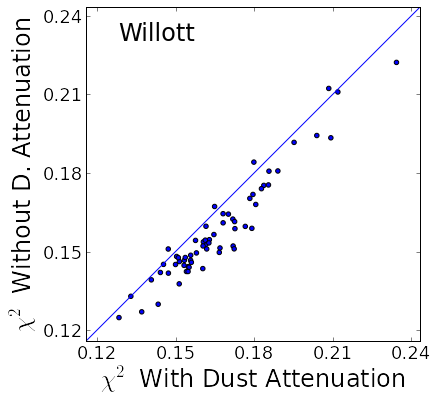

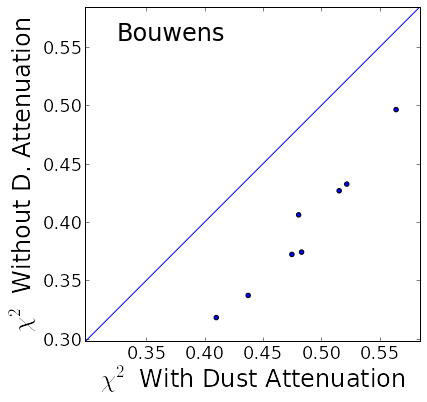

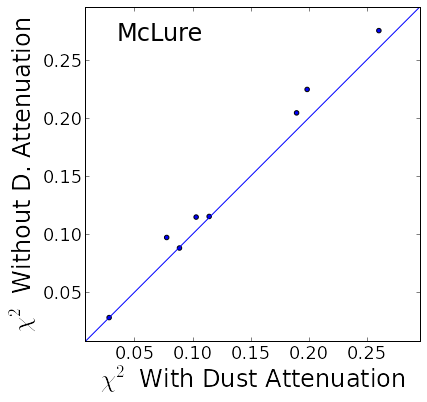

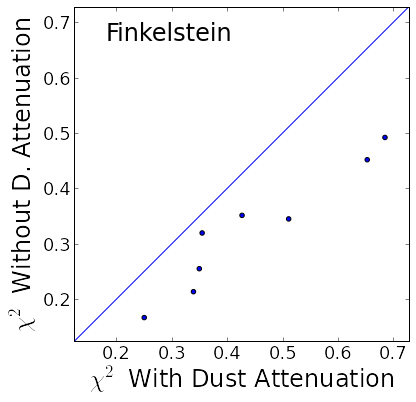

In [149]:
for i in range(4):
    FS = 24
    fig = figure(figsize=(7,6))
    ax = fig.add_subplot(111)
    ax.set_aspect("equal")
#ax2 = fig.add_subplot(222)
#ax3 = fig.add_subplot(223)
#ax4 = fig.add_subplot(224)

    #ax = [ax1, ax2, ax3, ax4]

    ax.scatter( W_D[i][:,1] , Wo_D[i][:,1])
    a = W_D[i][:,1].min();     b = Wo_D[i][:,1].min();     c = min(a,b)
    d = W_D[i][:,1].max();     e = Wo_D[i][:,1].max();     f = max(d,e)
    g = f-c
    x = linspace(c-g/10,f+g/10,20);     ax.plot(x,x);    
    ax.set_xlim(c-g/12,f+g/12);
    ax.set_ylim(c-g/12,f+g/12);
    ax.set_xlabel(r"$\chi^2$ With Dust Attenuation", fontsize=FS)
    ax.set_ylabel(r"$\chi^2$ Without D. Attenuation", fontsize=FS)
    ax.text(.1,.9,Name[i], transform=ax.transAxes, fontsize=FS)
    ax.tick_params(labelsize=18)
    if(i==0):   ax.set_xticks([0.12,0.15,0.18,0.21,0.24]);ax.set_yticks([0.12,0.15,0.18,0.21,0.24]);
    if(i==1):   ax.set_xticks([0.35,0.40,0.45,0.50,0.55])
    savefig(str(i)+".png")
    savefig("../paper/fig/chi2_OD"+str(i+1)+".pdf")
    